In [1]:
!kaggle datasets download -d whenamancodes/credit-card-customers-prediction --unzip

/bin/bash: kaggle: command not found


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# EDA

In [3]:
dataframe = pd.read_csv('/work/Credit-Card-Customers-Prediction/BankChurners.csv')
dataframe.rename(columns={'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1': 'NB1',
                    'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2': 'NB2'}, inplace= True)
#dataframe = dataframe[dataframe['Education_Level'] != 'Unknown']
#dataframe = dataframe[dataframe['Income_Category']!= 'Unknown']
#dataframe = dataframe[dataframe['Marital_Status']!= 'Unknown']
df_clients = dataframe[dataframe['Attrition_Flag'] != 'Attrited Customer']
df = dataframe[dataframe['Attrition_Flag'] == 'Attrited Customer']
df.head(10)

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,NB1,NB2
21,708508758,Attrited Customer,62,F,0,Graduate,Married,Less than $40K,Blue,49,...,1438.3,0,1438.3,1.047,692,16,0.600,0.000,0.99616,0.003836
39,708300483,Attrited Customer,66,F,0,Doctorate,Married,Unknown,Blue,56,...,7882.0,605,7277.0,1.052,704,16,0.143,0.077,0.99780,0.002197
51,779471883,Attrited Customer,54,F,1,Graduate,Married,Less than $40K,Blue,40,...,1438.3,808,630.3,0.997,705,19,0.900,0.562,0.99028,0.009720
54,714374133,Attrited Customer,56,M,2,Graduate,Married,$120K +,Blue,36,...,15769.0,0,15769.0,1.041,602,15,0.364,0.000,0.99671,0.003294
61,712030833,Attrited Customer,48,M,2,Graduate,Married,$60K - $80K,Silver,35,...,34516.0,0,34516.0,0.763,691,15,0.500,0.000,0.99823,0.001771
82,711013983,Attrited Customer,55,F,4,Unknown,Married,$40K - $60K,Blue,45,...,2158.0,0,2158.0,0.585,615,12,0.714,0.000,0.99763,0.002366
99,711887583,Attrited Customer,47,M,2,Unknown,Married,$80K - $120K,Blue,37,...,5449.0,1628,3821.0,0.696,836,18,0.385,0.299,0.99700,0.002997
127,720201033,Attrited Customer,53,M,2,Graduate,Married,$80K - $120K,Blue,41,...,11669.0,2227,9442.0,0.622,720,23,0.353,0.191,0.99447,0.005530
140,789322833,Attrited Customer,48,F,5,High School,Married,Less than $40K,Blue,38,...,8025.0,0,8025.0,0.654,673,18,0.800,0.000,0.99672,0.003282
144,767712558,Attrited Customer,59,M,1,College,Single,$60K - $80K,Blue,53,...,14979.0,0,14979.0,0.710,530,10,1.000,0.000,0.99639,0.003608


In [4]:
print('Shape = ',dataframe.shape, '\nDescription\n',dataframe.info(),'\Duplicated\n',dataframe.duplicated().sum())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CLIENTNUM                 10127 non-null  int64  
 1   Attrition_Flag            10127 non-null  object 
 2   Customer_Age              10127 non-null  int64  
 3   Gender                    10127 non-null  object 
 4   Dependent_count           10127 non-null  int64  
 5   Education_Level           10127 non-null  object 
 6   Marital_Status            10127 non-null  object 
 7   Income_Category           10127 non-null  object 
 8   Card_Category             10127 non-null  object 
 9   Months_on_book            10127 non-null  int64  
 10  Total_Relationship_Count  10127 non-null  int64  
 11  Months_Inactive_12_mon    10127 non-null  int64  
 12  Contacts_Count_12_mon     10127 non-null  int64  
 13  Credit_Limit              10127 non-null  float64
 14  Total_

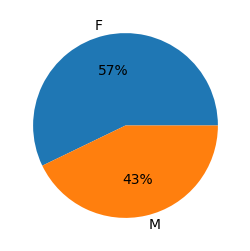

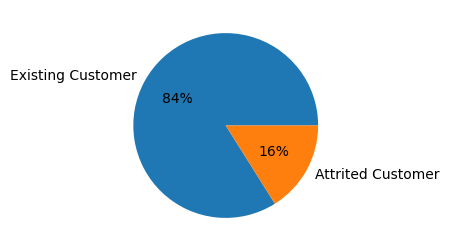

In [5]:
plt.figure(figsize=(3, 3))  

gender_counts = df['Gender'].value_counts()
labels = gender_counts.index
sizes = gender_counts.values
plt.pie(sizes, labels= labels, autopct='%1.f%%')

plt.show()


plt.figure(figsize=(3, 3)) 

af_counts = dataframe['Attrition_Flag'].value_counts()
labels = af_counts.index
sizes = af_counts.values
plt.pie(sizes, labels= labels, autopct='%1.f%%')

plt.show()


<Figure size 1200x600 with 0 Axes>

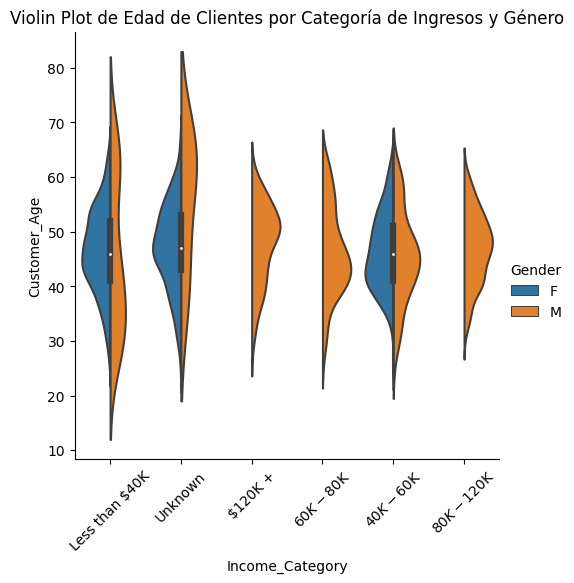

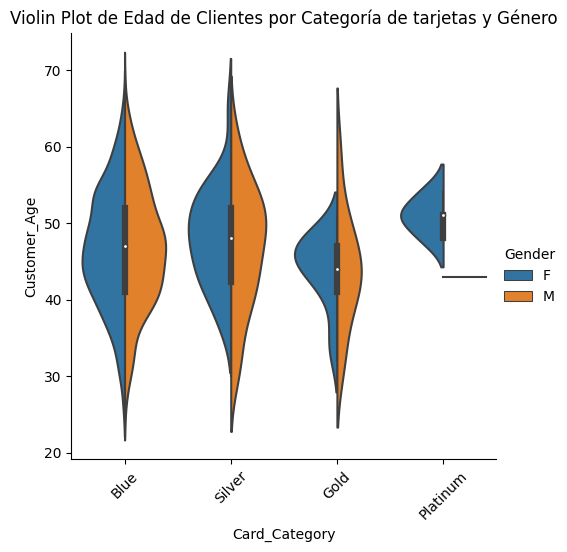

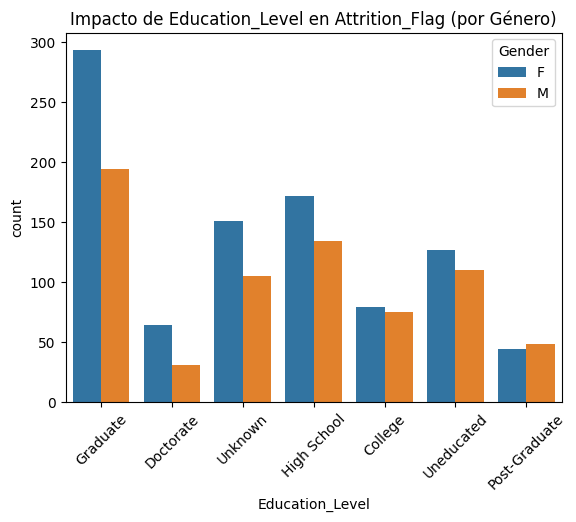

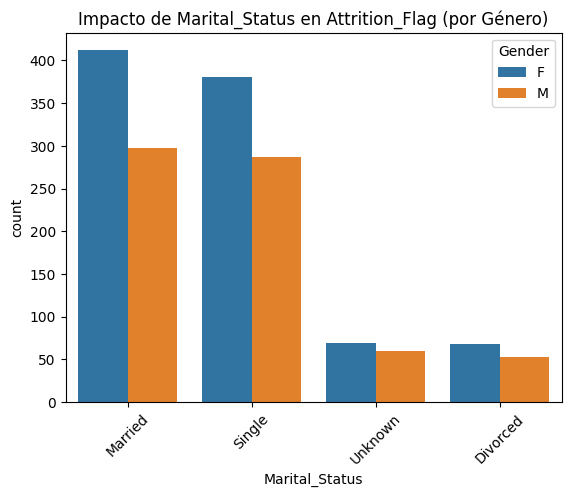

In [6]:

plt.figure(figsize=(12, 6))

sns.catplot(x="Income_Category", y="Customer_Age", hue="Gender", kind="violin", split=True, data=df)
plt.title('Violin Plot de Edad de Clientes por Categoría de Ingresos y Género')
plt.xticks(rotation=45, fontsize=10) 
plt.show()

sns.catplot(x="Card_Category", y="Customer_Age", hue="Gender", kind="violin", split=True, data=df)
plt.title('Violin Plot de Edad de Clientes por Categoría de tarjetas y Género')
plt.xticks(rotation=45, fontsize=10) 
plt.show()


sns.countplot(data=df, x='Education_Level', hue='Gender')
plt.title('Impacto de Education_Level en Attrition_Flag (por Género)')
plt.xticks(rotation=45, fontsize=10) 
plt.show()

sns.countplot(data=df, x='Marital_Status', hue='Gender')
plt.title('Impacto de Marital_Status en Attrition_Flag (por Género)')
plt.xticks(rotation=45, fontsize=10)  # Rota y ajusta el tamaño de las etiquetas del eje x
plt.show()


In [7]:
print('AVG Utilization ratio on clientes ',round(df_clients['Avg_Utilization_Ratio'].mean(),2),' on Churners ',round(df['Avg_Utilization_Ratio'].mean(),2))
print('Months inactive avg on clientes ',round(df_clients['Months_Inactive_12_mon'].mean(),2),' on Churners ',round(df['Months_Inactive_12_mon'].mean(),2))
print('Total transactions avg on clientes ',round(df_clients['Total_Trans_Amt'].mean(),2),' on Churners ',round(df['Total_Trans_Amt'].mean(),2))


AVG Utilization ratio on clientes  0.3  on Churners  0.16
Months inactive avg on clientes  2.27  on Churners  2.69
Total transactions avg on clientes  4654.66  on Churners  3095.03


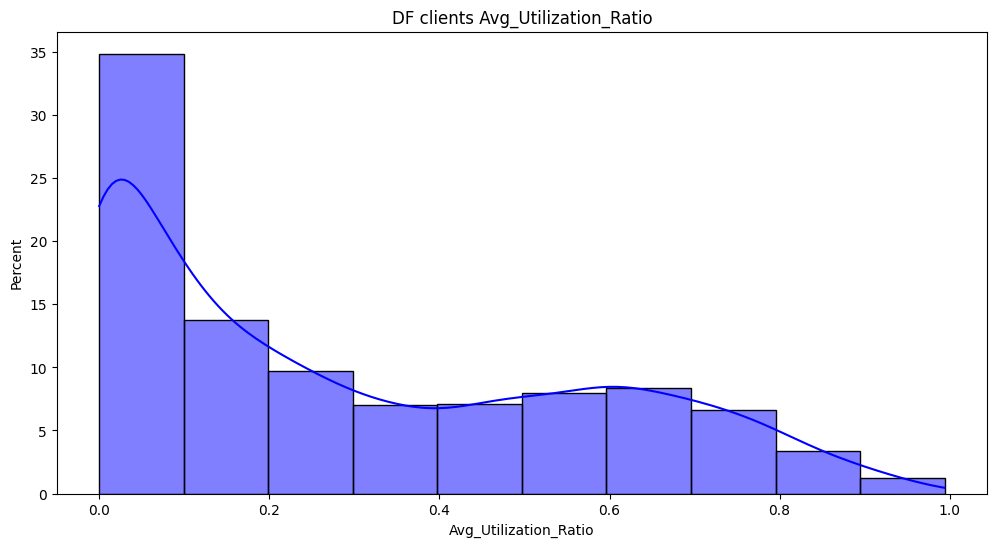

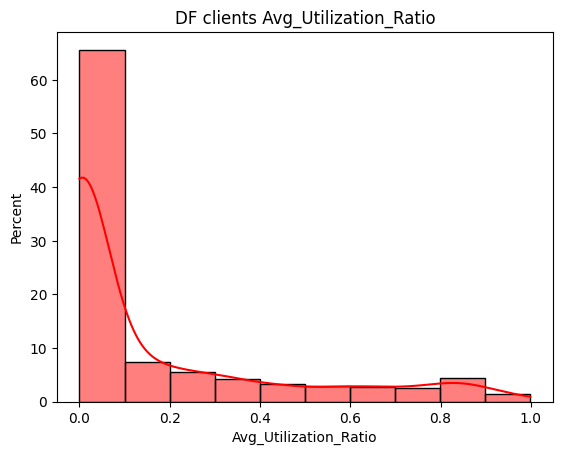

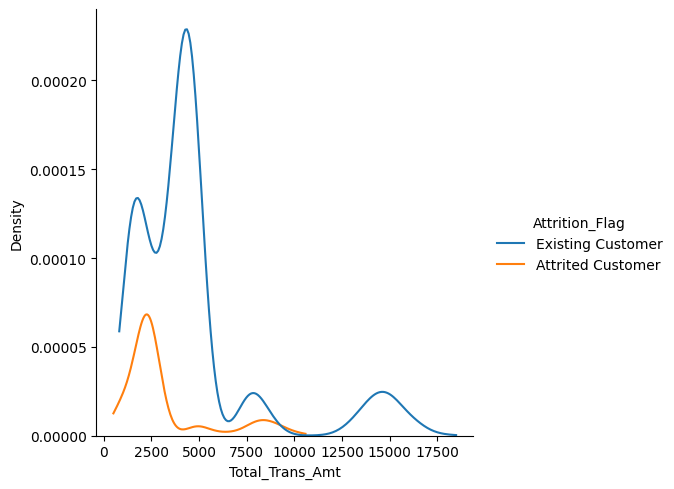

In [8]:
plt.figure(figsize=(12, 6))


#sns.displot(dataframe, x="Avg_Utilization_Ratio",y = 'Credit_Limit', hue= 'Attrition_Flag')
g = sns.histplot(df_clients["Avg_Utilization_Ratio"], bins=10 ,kde=True, color='blue', stat= 'percent')
plt.title('DF clients Avg_Utilization_Ratio')
plt.show()

g = sns.histplot(df["Avg_Utilization_Ratio"], bins=10, kde=True, color='red', stat= 'percent')
plt.title('DF clients Avg_Utilization_Ratio')
plt.show()


sns.displot(dataframe, x="Total_Trans_Amt", kind="kde", cut=0, hue= 'Attrition_Flag')
plt.show()


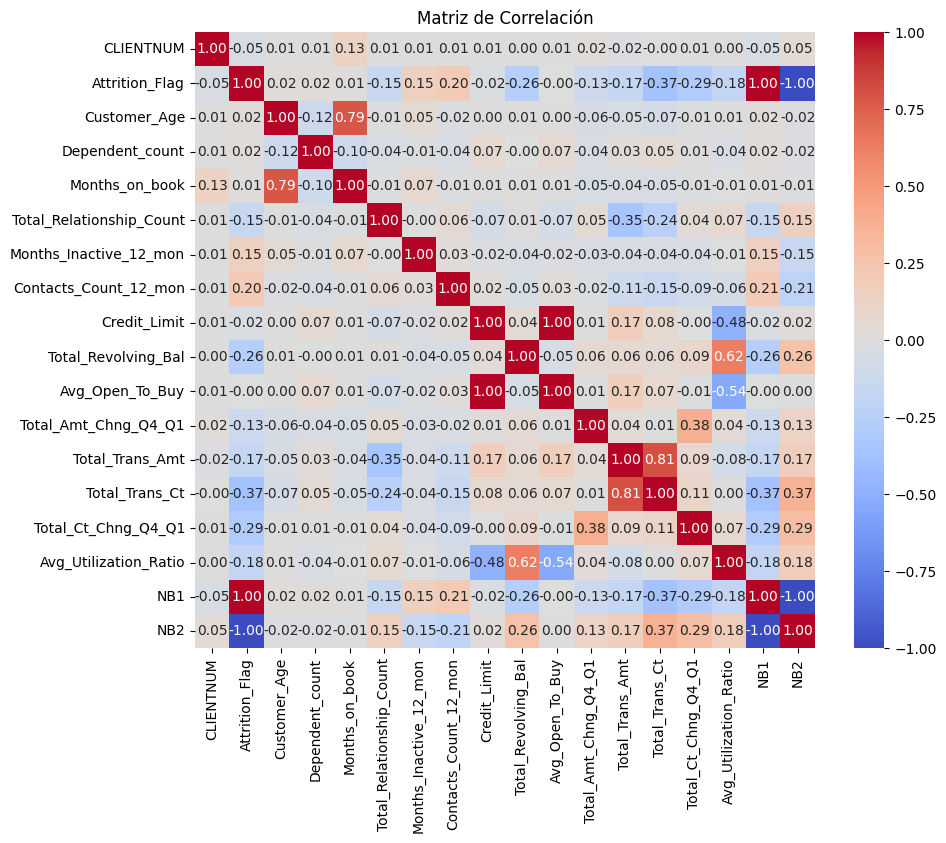

In [9]:
dataframe['Attrition_Flag'].replace({'Existing Customer': 0, 'Attrited Customer': 1}, inplace = True)
corr_matrix = dataframe.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm', center=0)
plt.title('Matriz de Correlación')
plt.show()


# Preparativos ML

In [10]:
df_encoded = pd.get_dummies(dataframe, columns=["Gender", "Education_Level", "Marital_Status", "Income_Category", "Card_Category"])
df_encoded


,CLIENTNUM,Attrition_Flag,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,...,Income_Category_$120K +,Income_Category_$40K - $60K,Income_Category_$60K - $80K,Income_Category_$80K - $120K,Income_Category_Less than $40K,Income_Category_Unknown,Card_Category_Blue,Card_Category_Gold,Card_Category_Platinum,Card_Category_Silver
0,768805383,0,45,3,39,5,1,3,12691.0,777,...,0,0,1,0,0,0,1,0,0,0
1,818770008,0,49,5,44,6,1,2,8256.0,864,...,0,0,0,0,1,0,1,0,0,0
2,713982108,0,51,3,36,4,1,0,3418.0,0,...,0,0,0,1,0,0,1,0,0,0
3,769911858,0,40,4,34,3,4,1,3313.0,2517,...,0,0,0,0,1,0,1,0,0,0
4,709106358,0,40,3,21,5,1,0,4716.0,0,...,0,0,1,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10122,772366833,0,50,2,40,3,2,3,4003.0,1851,...,0,1,0,0,0,0,1,0,0,0
10123,710638233,1,41,2,25,4,2,3,4277.0,2186,...,0,1,0,0,0,0,1,0,0,0
10124,716506083,1,44,1,36,5,3,4,5409.0,0,...,0,0,0,0,1,0,1,0,0,0
10125,717406983,1,30,2,36,4,3,3,5281.0,0,...,0,1,0,0,0,0,1,0,0,0


Arboles, XGBoost, KNN

In [11]:
!pip install xgboost==1.7.6

You should consider upgrading via the '/root/venv/bin/python -m pip install --upgrade pip' command.


In [12]:
from sklearn.model_selection import train_test_split



# Para árboles de decisión
from sklearn.tree import DecisionTreeClassifier

# Para XGBoost
import xgboost as xgb

# Para K-Nearest Neighbors (KNN)
from sklearn.neighbors import KNeighborsClassifier


from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.metrics import roc_curve, roc_auc_score, auc


2023-09-10 18:25:27.533716: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-09-10 18:25:27.681997: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2023-09-10 18:25:27.682035: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2023-09-10 18:25:27.705357: E tensorflow/stream_executor/cuda/cuda_blas.cc:2981] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-09-10 18:25:29.218819: W tensorflow/stream_executor/platform/de

In [13]:
X = df_encoded.drop('Attrition_Flag', axis=1)  
y = df_encoded['Attrition_Flag']
model = DecisionTreeClassifier(max_depth=5, criterion='gini')
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)


accuracy = accuracy_score(y_test, y_pred)
confusion = confusion_matrix(y_test, y_pred)
classification = classification_report(y_test, y_pred)

print("Accuracy:", accuracy)
print("Confusion Matrix:\n", confusion)
print("Classification Report:\n", classification)


Accuracy: 1.0
Confusion Matrix:
 [[1699    0]
 [   0  327]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      1699
           1       1.00      1.00      1.00       327

    accuracy                           1.00      2026
   macro avg       1.00      1.00      1.00      2026
weighted avg       1.00      1.00      1.00      2026



In [14]:
model = xgb.XGBClassifier(random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)


accuracy = accuracy_score(y_test, y_pred)
confusion = confusion_matrix(y_test, y_pred)
classification = classification_report(y_test, y_pred)

print("Accuracy:", accuracy)
print("Confusion Matrix:\n", confusion)
print("Classification Report:\n", classification)

Accuracy: 1.0
Confusion Matrix:
 [[1699    0]
 [   0  327]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      1699
           1       1.00      1.00      1.00       327

    accuracy                           1.00      2026
   macro avg       1.00      1.00      1.00      2026
weighted avg       1.00      1.00      1.00      2026



In [15]:
knn_model = KNeighborsClassifier(n_neighbors=2) 
knn_model.fit(X_train, y_train)

y_pred = knn_model.predict(X_test)


accuracy = accuracy_score(y_test, y_pred)
confusion = confusion_matrix(y_test, y_pred)
classification = classification_report(y_test, y_pred)

print("Accuracy:", accuracy)
print("Confusion Matrix:\n", confusion)
print("Classification Report:\n", classification)

Accuracy: 0.8188548864758144
Confusion Matrix:
 [[1650   49]
 [ 318    9]]
Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.97      0.90      1699
           1       0.16      0.03      0.05       327

    accuracy                           0.82      2026
   macro avg       0.50      0.50      0.47      2026
weighted avg       0.73      0.82      0.76      2026



Alright, it appears that our first models, TreeDecision and XGBoost, have an accuracy of 100%, which could indicate overfitting. When overfitting occurs, we may encounter some issues because it means that our models perform perfectly with this data but could present problems with different or new data.

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=a294b2d6-f686-4c32-aa0c-6491cb6a0c52' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>